# Census Income Data Set

## 2.1 Import packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

## 2.2 Import data

In [2]:
data = pd.read_csv("census-income.csv",na_values='?',skipinitialspace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data[data['marital-status'] == 'Never-married'].shape

(10683, 15)

### EDA

In [4]:
data.shape

(32561, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

a) Extract the “education” column and store it in “census_ed” .

In [10]:
census_ed = data['workclass'].value_counts()
census_ed

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

b) Extract all the columns from “age” to “relationship” and store it in “census_seq”.

In [11]:
census_seq = data.iloc[:,0:8]
census_seq.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife


c) Extract the column number “5”, “8”, “11” and store it in “census_col”.

In [12]:
census_col = data.iloc[:, np.r_[5,8,11]]
census_col

,marital-status,race,capital-loss
0,Never-married,White,0
1,Married-civ-spouse,White,0
2,Divorced,White,0
3,Married-civ-spouse,Black,0
4,Married-civ-spouse,Black,0
...,...,...,...
32556,Married-civ-spouse,White,0
32557,Married-civ-spouse,White,0
32558,Widowed,White,0
32559,Never-married,White,0


d) Extract all the male employees who work in state-gov and store it in “male_gov”.

In [13]:
male_gov = data[(data['sex'] =='Male') & (data['workclass'] == 'State-gov')].shape
male_gov

(795, 15)

e) Extract all the 39 year olds who either have a bachelor's degree or who are native of the United States and store the result in “census_us”.

In [14]:
census_us = data[(data['age'] == 39) & (data['education'] == 'Bachelors') & (data['native-country'] == 'United-States')].shape
census_us

(139, 15)

f) Extract 200 random rows from the “census” data frame and store it in “census_200”.

In [15]:
census_200 = data.sample(n=200)
census_200

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5730,26,Private,34110,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,44,United-States,<=50K
3504,31,Private,120461,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
14329,64,Private,46087,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K
2998,38,Private,234962,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,2829,0,30,Mexico,<=50K
694,23,State-gov,335453,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Female,0,0,20,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22550,44,Private,171722,HS-grad,9,Separated,Other-service,Unmarried,White,Female,0,0,39,United-States,<=50K
13870,56,Private,257555,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
9053,50,Private,142073,HS-grad,9,Married-spouse-absent,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,<=50K
16826,27,Private,218785,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


g) Get the count of different levels of the “workclass” column

In [16]:
data['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

h) Calculate the mean of the “capital.gain” column grouped according to “workclass”.

In [17]:
a= data.groupby('workclass')['capital-gain'].mean()
a

workclass
Federal-gov          832.321315
Local-gov            829.230285
Private              879.858207
Self-emp-inc        4810.746741
Self-emp-not-inc    1913.134454
State-gov            684.306489
Without-pay          487.857143
Name: capital-gain, dtype: float64

i) Create a separate dataframe with the details of males and females from the census data that has income more than 50,000.

In [18]:
dataframe =data[(data['sex'] == 'Male') & (data['income'] == '>50K') & (data['sex'] == 'Female') & (data['income'] == '>50K')]
dataframe

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


j) Calculate the percentage of people from the United States who are private employees and earn less than 50,000 annually.

In [19]:
c = len(data[(data['native-country'] == 'United-States' ) & (data['income'] == '<=50K' ) & (data['workclass'] == 'Private' )])
c/len(data)*100

51.70081559578277

k) Calculate the percentage of married people in the census data.

In [20]:
Percentage_of_marital_status = (data['marital-status'].value_counts()/len(data)*100)
Percentage_of_marital_status

Married-civ-spouse       46.631523
Never-married            32.245872
Divorced                 13.971222
Separated                 3.113189
Widowed                   2.741861
Married-spouse-absent     1.226709
Married-AF-spouse         0.069624
Name: marital-status, dtype: float64

l) Calculate the percentage of high school graduates earning more than 50,000 annually

In [21]:
Percentage_of_HS_grad = data.query("income == '>50K'")['education'].value_counts()
Percentage_of_HS_grad/len(data)*100

Bachelors       7.048604
HS-grad         5.361050
Some-college    4.429414
Masters         3.043565
Prof-school     1.346065
Assoc-voc       1.140508
Doctorate       0.928320
Assoc-acdm      0.848750
10th            0.195610
11th            0.195610
7th-8th         0.116040
12th            0.096147
9th             0.082886
5th-6th         0.039785
1st-4th         0.019893
Name: education, dtype: float64

In [22]:
data['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

In [23]:
data['income']=data['income'].map({'<=50K': 0, '>50K': 1})
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [24]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [25]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes!='O']
numerical_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income']

In [26]:
num = data.select_dtypes(include = np.number)
obj = data.select_dtypes(include = np.object)
data_merg = pd.concat([num,obj],axis =1)

In [27]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [28]:
L=LabelEncoder()

In [29]:
x=list(data.columns)
for col in x:
    if data[col].dtype=='object':
        data[col]=L.fit_transform(data[col])

# 4. Logistic Regression:

In [30]:
x = data[['occupation']]
y=data[['income']]


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=0)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logisticRegr = LogisticRegression()

In [34]:
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [35]:
test_pred = logisticRegr.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score,classification_report

In [37]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      7921
           1       0.00      0.00      0.00      2636

    accuracy                           0.75     10557
   macro avg       0.38      0.50      0.43     10557
weighted avg       0.56      0.75      0.64     10557



In [38]:
c1=confusion_matrix(y_test,test_pred)
c1

array([[7921,    0],
       [2636,    0]], dtype=int64)

In [39]:
accuracy_score(y_test,test_pred)

0.750307852609643

# b)Build a multiple logistic regression model as follows:

In [40]:
X = data[['age','workclass','education']]
Y = data[['income']]

In [41]:
x1_train,x1_test,y1_train,y1_test, = train_test_split(X,Y,test_size = 0.30 ,random_state = 42)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr = LogisticRegression()

In [44]:
lr.fit(x1_train, y1_train)

LogisticRegression()

In [45]:
y_pred = lr.predict(x1_test)

In [46]:
from sklearn.metrics import accuracy_score,classification_report

In [47]:
print(classification_report(y1_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.84      6767
           1       0.26      0.04      0.06      2282

    accuracy                           0.73      9049
   macro avg       0.50      0.50      0.45      9049
weighted avg       0.63      0.73      0.65      9049



In [48]:
c2=confusion_matrix(y1_test,y_pred)
c2

array([[6538,  229],
       [2201,   81]], dtype=int64)

In [49]:
accuracy_score(y1_test,y_pred)

0.7314620400044204

# 5. Decision Tree

In [50]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [51]:
from sklearn import tree

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0, test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(21113, 14)
(9049, 14)


In [53]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [54]:
accuracy_score(y_test,y_test_pred)

0.804729804398276

In [55]:
c3=confusion_matrix(y_test,y_test_pred)
c3

array([[5875,  889],
       [ 878, 1407]], dtype=int64)

# 6. Random Forest:
 a) Build a random forest model as follows


In [56]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf=RandomForestClassifier(n_estimators = 300)
rf.fit(x_train,y_train)


RandomForestClassifier(n_estimators=300)

In [60]:
y_pred=rf.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score,classification_report

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4532
           1       0.75      0.62      0.68      1501

    accuracy                           0.86      6033
   macro avg       0.82      0.78      0.79      6033
weighted avg       0.85      0.86      0.85      6033



In [63]:
accuracy_score(y_test,y_pred)

0.85513011768606

7. For this problem, use the population dataset, and perform the following:
    
    
1.	EDA on the time series to find trends and seasonality.
2.	Forecast the population on the given dataset for the next 6 months. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
Population = pd.read_csv('popdata.csv')
Population.head()

FileNotFoundError: [Errno 2] No such file or directory: 'popdata.csv'

In [4]:
#EDA on the time series data 
Population.shape

(816, 2)

In [67]:
Population.describe()

,value
count,816.000000
mean,214837.767826
std,50519.140567
min,127299.000000
25%,172715.250000
50%,210547.500000
75%,260354.250000
max,301299.946000


In [68]:
Population['date'] = pd.to_datetime(Population['date'])


In [69]:
Population.index = Population['date']
del Population['date']

In [70]:
Population.

,value
date,
1952-01-01,127299.0
1952-02-01,127517.0
1952-03-01,127721.0
1952-04-01,127933.0
1952-05-01,128130.0


<AxesSubplot:xlabel='date'>

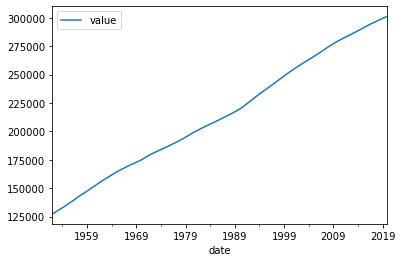

In [71]:
#plotting the time series
Population.plot()

In [1]:
p

NameError: name 'Population' is not defined

In [72]:
mean_log = data.rolling(window=24).mean()
std_log = data.rolling(window=24).std()


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

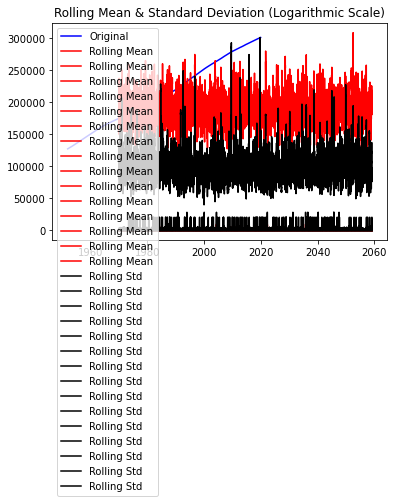

In [73]:

plt.plot(Population, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [74]:
#checking the stationarity of the series 
from statsmodels.tsa.stattools import adfuller
result = adfuller(Population['value'])
print(result)

(-0.6653174109472848, 0.8555297779110316, 17, 798, {'1%': -3.4385711275998583, '5%': -2.8651686574447375, '10%': -2.568702230639255}, 6593.486797606457)


In [75]:
result[3]

798

In [76]:
result = adfuller(Population['value'].diff().dropna())
result

(-2.009895421289274,
 0.28225122766444855,
 21,
 793,
 {'1%': -3.438623132449471,
  '5%': -2.8651915799370014,
  '10%': -2.568714441670417},
 6580.032300639022)

<AxesSubplot:xlabel='date'>

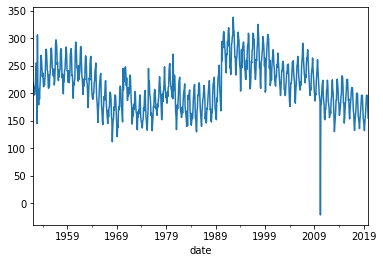

In [77]:
Population['value'].diff().dropna().plot()

<AxesSubplot:xlabel='date'>

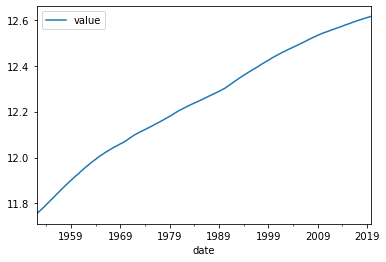

In [78]:
#logrithmic comutation to make the time series stationary
first_log = np.log(Population)
first_log = first_log.dropna()
first_log.plot()

In [79]:
#checking the stationarity of the series 
from statsmodels.tsa.stattools import adfuller
result = adfuller(first_log['value'])
print(result)

(-2.0920193871294406, 0.24773573149002143, 17, 798, {'1%': -3.4385711275998583, '5%': -2.8651686574447375, '10%': -2.568702230639255}, -12897.725797238965)


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

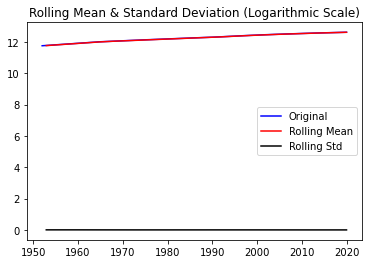

In [80]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

plt.plot(first_log, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [81]:
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data.head() 

,value
date,
1952-12-01,0.009811
1953-01-01,0.009748
1953-02-01,0.009553
1953-03-01,0.009237
1953-04-01,0.009139


In [82]:
new_data.shape

(805, 1)

In [83]:
#adfuller test for stationarity
result = adfuller(new_data['value'])
print(result)

(-1.873742184124301, 0.34451262406275285, 17, 787, {'1%': -3.438686413400388, '5%': -2.8652194721349424, '10%': -2.5687293001910008}, -12895.296210615545)


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

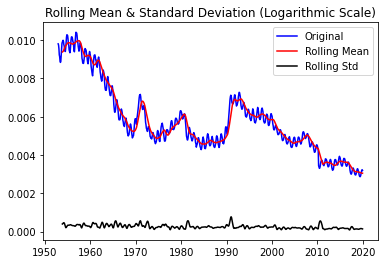

In [84]:
#removing seasonality from the time series
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

plt.plot(new_data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

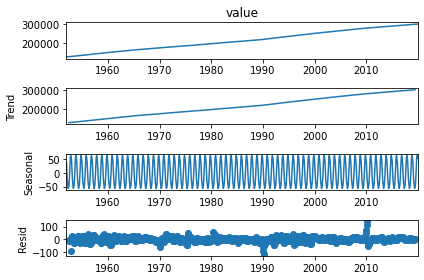

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(Population['value'].dropna())

decompose_result.plot();

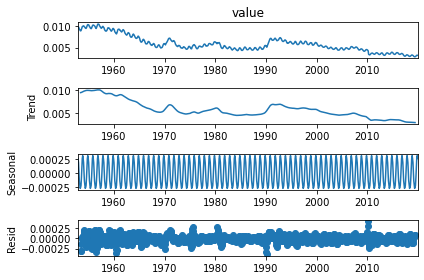

In [86]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(new_data['value'].dropna())

decompose_result.plot();